In [1]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import numpy as np
from matplotlib import pyplot as plt 

fname = 'C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\tt2l2nu\\nano.root'
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")


events['weight'] = events.genWeight
#events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) ]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.5)&  (np.abs(events.Muon.dxy) < 0.005)]
#events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]

muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
notinjet1 = ak.any(muon1.jetIdx == -1) 
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['OtherMuon'] = events.Muon[~( (events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005))]
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=0.5)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
notinjet2 = ak.any(tau2.jetIdx == int(-1))
notinjet3 = ak.any(tau3.jetIdx == int(-1))
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  
events = events[ak.num(events.SelElectron) + ak.num(events.SelMuon) + ak.num(events.SelTau) == 3]   
events['SelLepton'] = ak.concatenate([events.SelElectron, events.SelMuon, events.SelTau],axis = -1)
tt_tau_id = ak.flatten(events.SelTau.idDeepTau2017v2p1VSjet)
tt_tau_rawid = ak.flatten(events.SelTau.rawDeepTau2017v2p1VSjet)


events_temp = events[ak.all(events.SelTau.genPartIdx >=0, axis = -1)]
events_temp = events_temp[ak.all(events_temp.SelTau.genPartIdx <3, axis = -1)]
tt_true_tau_rawid = ak.flatten(events_temp.SelTau.rawDeepTau2017v2p1VSjet[abs(events_temp.GenVisTau[events_temp.SelTau.genPartIdx].parent.pdgId) == 15])


events['true_taus'] = events.SelTau[events.SelTau.genPartIdx >=0]
events['true_taus'] = events.true_taus[events.true_taus.genPartIdx < 5]
events['true_taus'] = events.true_taus[abs(events.GenVisTau[events.true_taus.genPartIdx].parent.pdgId) == 15]
tt_true_tau_rawid_2 = ak.flatten(events.true_taus.rawDeepTau2017v2p1VSjet)


tt_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90)
tt_true_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90[abs(events.GenPart[events.SelElectron.genPartIdx].pdgId) == 11])
tt_electron_TTHid = ak.flatten(events.SelElectron.mvaTTH)
tt_muon_id = ak.flatten(events.SelMuon.pfRelIso03_all)





###############WZ

fname = 'C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\wz\\nano.root'
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")


events['weight'] = events.genWeight
#events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) ]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.5)&  (np.abs(events.Muon.dxy) < 0.005)]
#events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]

muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
notinjet1 = ak.any(muon1.jetIdx == -1) 
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['OtherMuon'] = events.Muon[~( (events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005))]
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=0.5)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
notinjet2 = ak.any(tau2.jetIdx == int(-1))
notinjet3 = ak.any(tau3.jetIdx == int(-1))
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  
events = events[ak.num(events.SelElectron) + ak.num(events.SelMuon) + ak.num(events.SelTau) == 3]   
events['SelLepton'] = ak.concatenate([events.SelElectron, events.SelMuon, events.SelTau],axis = -1)
wz_tau_rawid = ak.flatten(events.SelTau.rawDeepTau2017v2p1VSjet)
wz_tau_id = ak.flatten(events.SelTau.idDeepTau2017v2p1VSjet)
wz_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90)
wz_true_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90[abs(events.GenPart[events.SelElectron.genPartIdx].pdgId) == 11])
events_temp = events[ak.all(events.SelTau.genPartIdx >=0, axis = -1)]
events_temp = events_temp[ak.all(events_temp.SelTau.genPartIdx <3, axis = -1)]
wz_true_tau_rawid = ak.flatten(events_temp.SelTau.rawDeepTau2017v2p1VSjet[abs(events_temp.GenVisTau[events_temp.SelTau.genPartIdx].parent.pdgId) == 15])
wz_muon_id = ak.flatten(events.SelMuon.pfRelIso03_all)
wz_electron_TTHid = ak.flatten(events.SelElectron.mvaTTH)


events['true_taus'] = events.SelTau[events.SelTau.genPartIdx >=0]
events['true_taus'] = events.true_taus[events.true_taus.genPartIdx < 3]
events['true_taus'] = events.true_taus[abs(events.GenVisTau[events.true_taus.genPartIdx].parent.pdgId) == 15]
wz_true_tau_rawid_2 = ak.flatten(events.true_taus.rawDeepTau2017v2p1VSjet)




######################ZZ

fname = 'C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\zz\\nano.root'
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")


events['weight'] = events.genWeight
#events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) ]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.5)&  (np.abs(events.Muon.dxy) < 0.005)]
#events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
notinjet1 = ak.any(muon1.jetIdx == -1) 
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['OtherMuon'] = events.Muon[~( (events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005))]
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=0.5)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
notinjet2 = ak.any(tau2.jetIdx == int(-1))
notinjet3 = ak.any(tau3.jetIdx == int(-1))
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  
events = events[ak.num(events.SelElectron) + ak.num(events.SelMuon) + ak.num(events.SelTau) == 3]   
events['SelLepton'] = ak.concatenate([events.SelElectron, events.SelMuon, events.SelTau],axis = -1)
zz_tau_id = ak.flatten(events.SelTau.idDeepTau2017v2p1VSjet)
zz_tau_rawid = ak.flatten(events.SelTau.rawDeepTau2017v2p1VSjet)
zz_electron_TTHid = ak.flatten(events.SelElectron.mvaTTH)
zz_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90)
zz_true_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90[abs(events.GenPart[events.SelElectron.genPartIdx].pdgId) == 11])
events_temp = events[ak.all(events.SelTau.genPartIdx >=0, axis = -1)]
events_temp = events_temp[ak.all(events_temp.SelTau.genPartIdx <5, axis = -1)]
zz_true_tau_rawid = ak.flatten(events_temp.SelTau.rawDeepTau2017v2p1VSjet[abs(events_temp.GenVisTau[events_temp.SelTau.genPartIdx].parent.pdgId) == 15])
zz_muon_id = ak.flatten(events.SelMuon.pfRelIso03_all)

events['true_taus'] = events.SelTau[events.SelTau.genPartIdx >=0]
events['true_taus'] = events.true_taus[events.true_taus.genPartIdx < 5]
events['true_taus'] = events.true_taus[abs(events.GenVisTau[events.true_taus.genPartIdx].parent.pdgId) == 15]
zz_true_tau_rawid_2 = ak.flatten(events.true_taus.rawDeepTau2017v2p1VSjet)


###############data test
fname = 'C:\\Users\\lucas\\Desktop\\PDM\\analysis\\data_test.root'
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")
events['weight'] = events.genWeight
#events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) ]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.5)&  (np.abs(events.Muon.dxy) < 0.005)]
#events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
notinjet1 = ak.any(muon1.jetIdx == -1) 
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['OtherMuon'] = events.Muon[~( (events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005))]
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=0.5)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
notinjet2 = ak.any(tau2.jetIdx == int(-1))
notinjet3 = ak.any(tau3.jetIdx == int(-1))
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  
events = events[ak.num(events.SelElectron) + ak.num(events.SelMuon) + ak.num(events.SelTau) == 3]   
events['SelLepton'] = ak.concatenate([events.SelElectron, events.SelMuon, events.SelTau],axis = -1)
sig_tau_id = ak.flatten(events.SelTau.idDeepTau2017v2p1VSjet)
sig_tau_rawid = ak.flatten(events.SelTau.rawDeepTau2017v2p1VSjet)
sig_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90)
sig_muon_id = ak.flatten(events.SelMuon.pfRelIso03_all)
sig_electron_TTHid = ak.flatten(events.SelElectron.mvaTTH)
sig_true_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90[abs(events.GenPart[events.SelElectron.genPartIdx].pdgId) == 11])
events_temp = events[ak.all(events.SelTau.genPartIdx >=0, axis = -1)]
events_temp = events_temp[ak.all(events_temp.SelTau.genPartIdx <5, axis = -1)]
sig_true_tau_rawid = ak.flatten(events_temp.SelTau.rawDeepTau2017v2p1VSjet[abs(events_temp.GenVisTau[events_temp.SelTau.genPartIdx].parent.pdgId) == 15])

events['true_taus'] = events.SelTau[events.SelTau.genPartIdx >=0]
events['true_taus'] = events.true_taus[events.true_taus.genPartIdx < 5]
events['true_taus'] = events.true_taus[abs(events.GenVisTau[events.true_taus.genPartIdx].parent.pdgId) == 15]
sig_true_tau_rawid_2 = ak.flatten(events.true_taus.rawDeepTau2017v2p1VSjet)







C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx2 => SubJet
  RuntimeWarning,


done


C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx2 => SubJet
  RuntimeWarning,


done
done
done


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


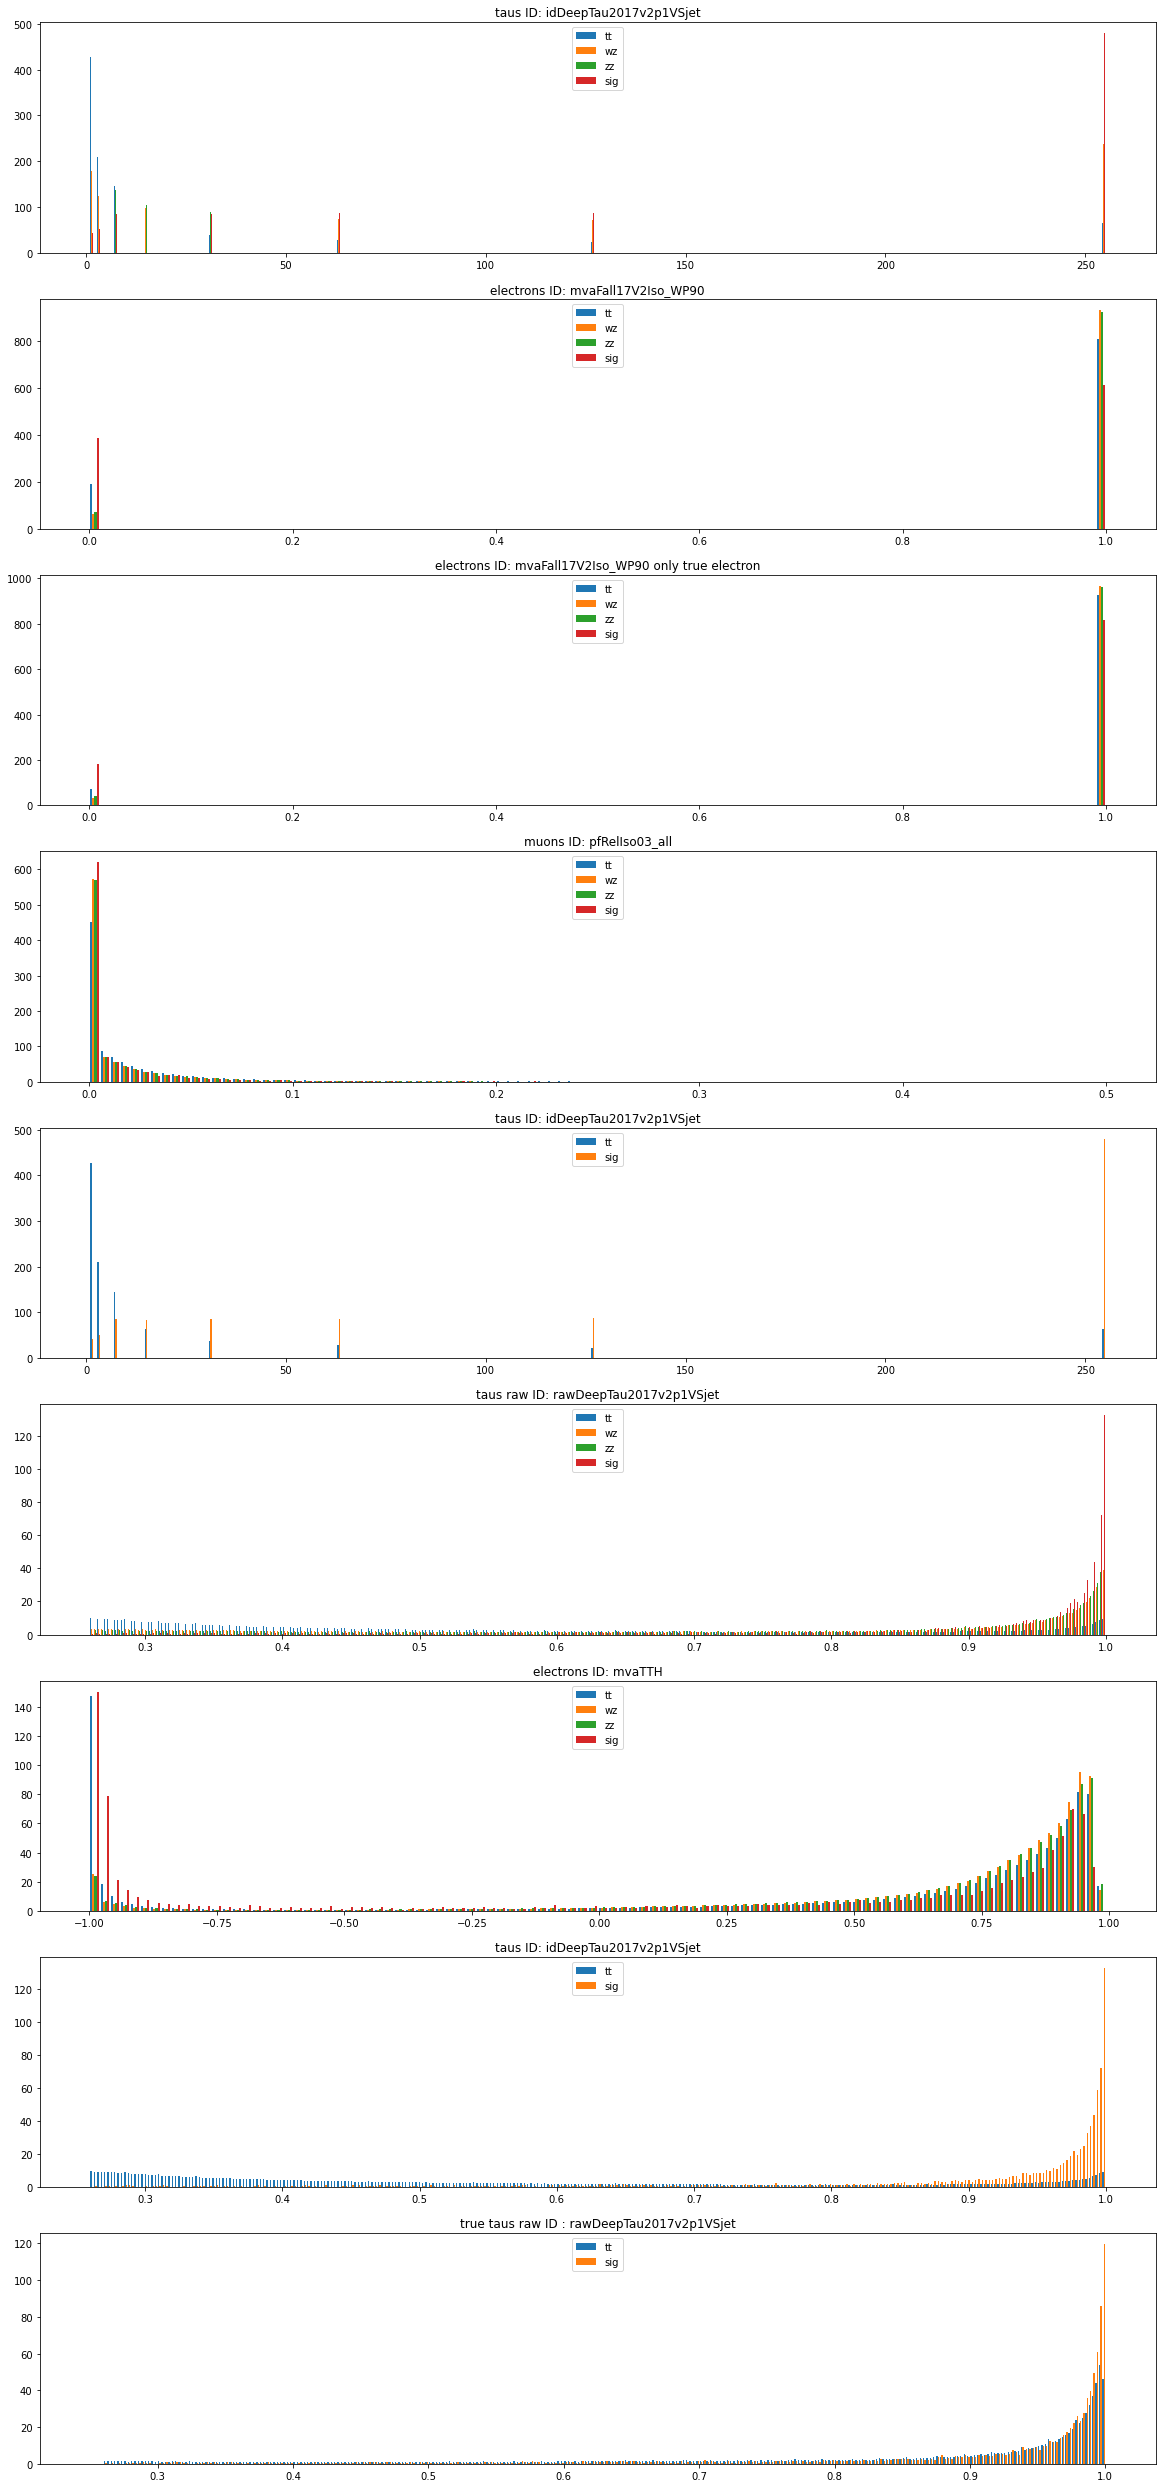

In [2]:
(counts1, bins1) = np.histogram(tt_tau_id, bins = 300)
(counts2, bins2) = np.histogram(wz_tau_id, bins = 300)
(counts3, bins3) = np.histogram(zz_tau_id, bins = 300)
(counts4, bins4) = np.histogram(sig_tau_id, bins = 300)
plt.figure(figsize=(20,50))
plt.subplot(10, 1, 1)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("taus ID: idDeepTau2017v2p1VSjet")
plt.subplot(10, 1, 2)
(counts1, bins1) = np.histogram(tt_electron_id, bins = 100)
(counts2, bins2) = np.histogram(wz_electron_id, bins = 100)
(counts3, bins3) = np.histogram(zz_electron_id, bins = 100)
(counts4, bins4) = np.histogram(sig_electron_id, bins = 100)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("electrons ID: mvaFall17V2Iso_WP90")
plt.subplot(10, 1, 3)
(counts1, bins1) = np.histogram(tt_true_electron_id, bins = 100)
(counts2, bins2) = np.histogram(wz_true_electron_id, bins = 100)
(counts3, bins3) = np.histogram(zz_true_electron_id, bins = 100)
(counts4, bins4) = np.histogram(sig_true_electron_id, bins = 100)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("electrons ID: mvaFall17V2Iso_WP90 only true electron")

plt.subplot(10, 1, 4)
(counts1, bins1) = np.histogram(tt_muon_id, bins = 100)
(counts2, bins2) = np.histogram(wz_muon_id, bins = 100)
(counts3, bins3) = np.histogram(zz_muon_id, bins = 100)
(counts4, bins4) = np.histogram(sig_muon_id, bins = 100)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("muons ID: pfRelIso03_all")
(counts1, bins1) = np.histogram(tt_tau_id, bins = 300)
(counts4, bins4) = np.histogram(sig_tau_id, bins = 300)
plt.subplot(10, 1, 5)
plt.hist([bins1[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts4/sum(counts4)], label = ["tt", "sig"])
plt.legend(loc='upper center')
plt.title("taus ID: idDeepTau2017v2p1VSjet")

(counts1, bins1) = np.histogram(tt_tau_rawid, bins = 300)
(counts2, bins2) = np.histogram(wz_tau_rawid, bins = 300)
(counts3, bins3) = np.histogram(zz_tau_rawid, bins = 300)
(counts4, bins4) = np.histogram(sig_tau_rawid, bins = 300)
plt.subplot(10, 1, 6)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("taus raw ID: rawDeepTau2017v2p1VSjet")

plt.subplot(10, 1, 7)
(counts1, bins1) = np.histogram(tt_electron_TTHid, bins = 100)
(counts2, bins2) = np.histogram(wz_electron_TTHid, bins = 100)
(counts3, bins3) = np.histogram(zz_electron_TTHid, bins = 100)
(counts4, bins4) = np.histogram(sig_electron_TTHid, bins = 100)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("electrons ID: mvaTTH")

(counts1, bins1) = np.histogram(tt_tau_rawid, bins = 300)
(counts4, bins4) = np.histogram(sig_tau_rawid, bins = 300)
plt.subplot(10, 1, 8)
plt.hist([bins1[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts4/sum(counts4)], label = ["tt", "sig"])
plt.legend(loc='upper center')
plt.title("taus ID: idDeepTau2017v2p1VSjet")


(counts1, bins1) = np.histogram(tt_true_tau_rawid_2, bins = 300, range = (0.25,1))
(counts4, bins4) = np.histogram(sig_true_tau_rawid_2, bins = 300, range = (0.25,1))
plt.subplot(10, 1, 9)

plt.hist([bins1[:-1], bins4[:-1]], bins4, weights=[1000*counts1/sum(counts1), 1000*counts4/sum(counts4)], label = ["tt", "sig"])
plt.legend(loc='upper center')
plt.title("true taus raw ID : rawDeepTau2017v2p1VSjet")


plt.savefig("ID_distributions_leptons.pdf")
plt.show()

C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx2 => SubJet
  RuntimeWarning,


done
done
done
done
[<event 1:166:24629>, <event 1:166:24655>, ... <event 1:495:73723>]
1416


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


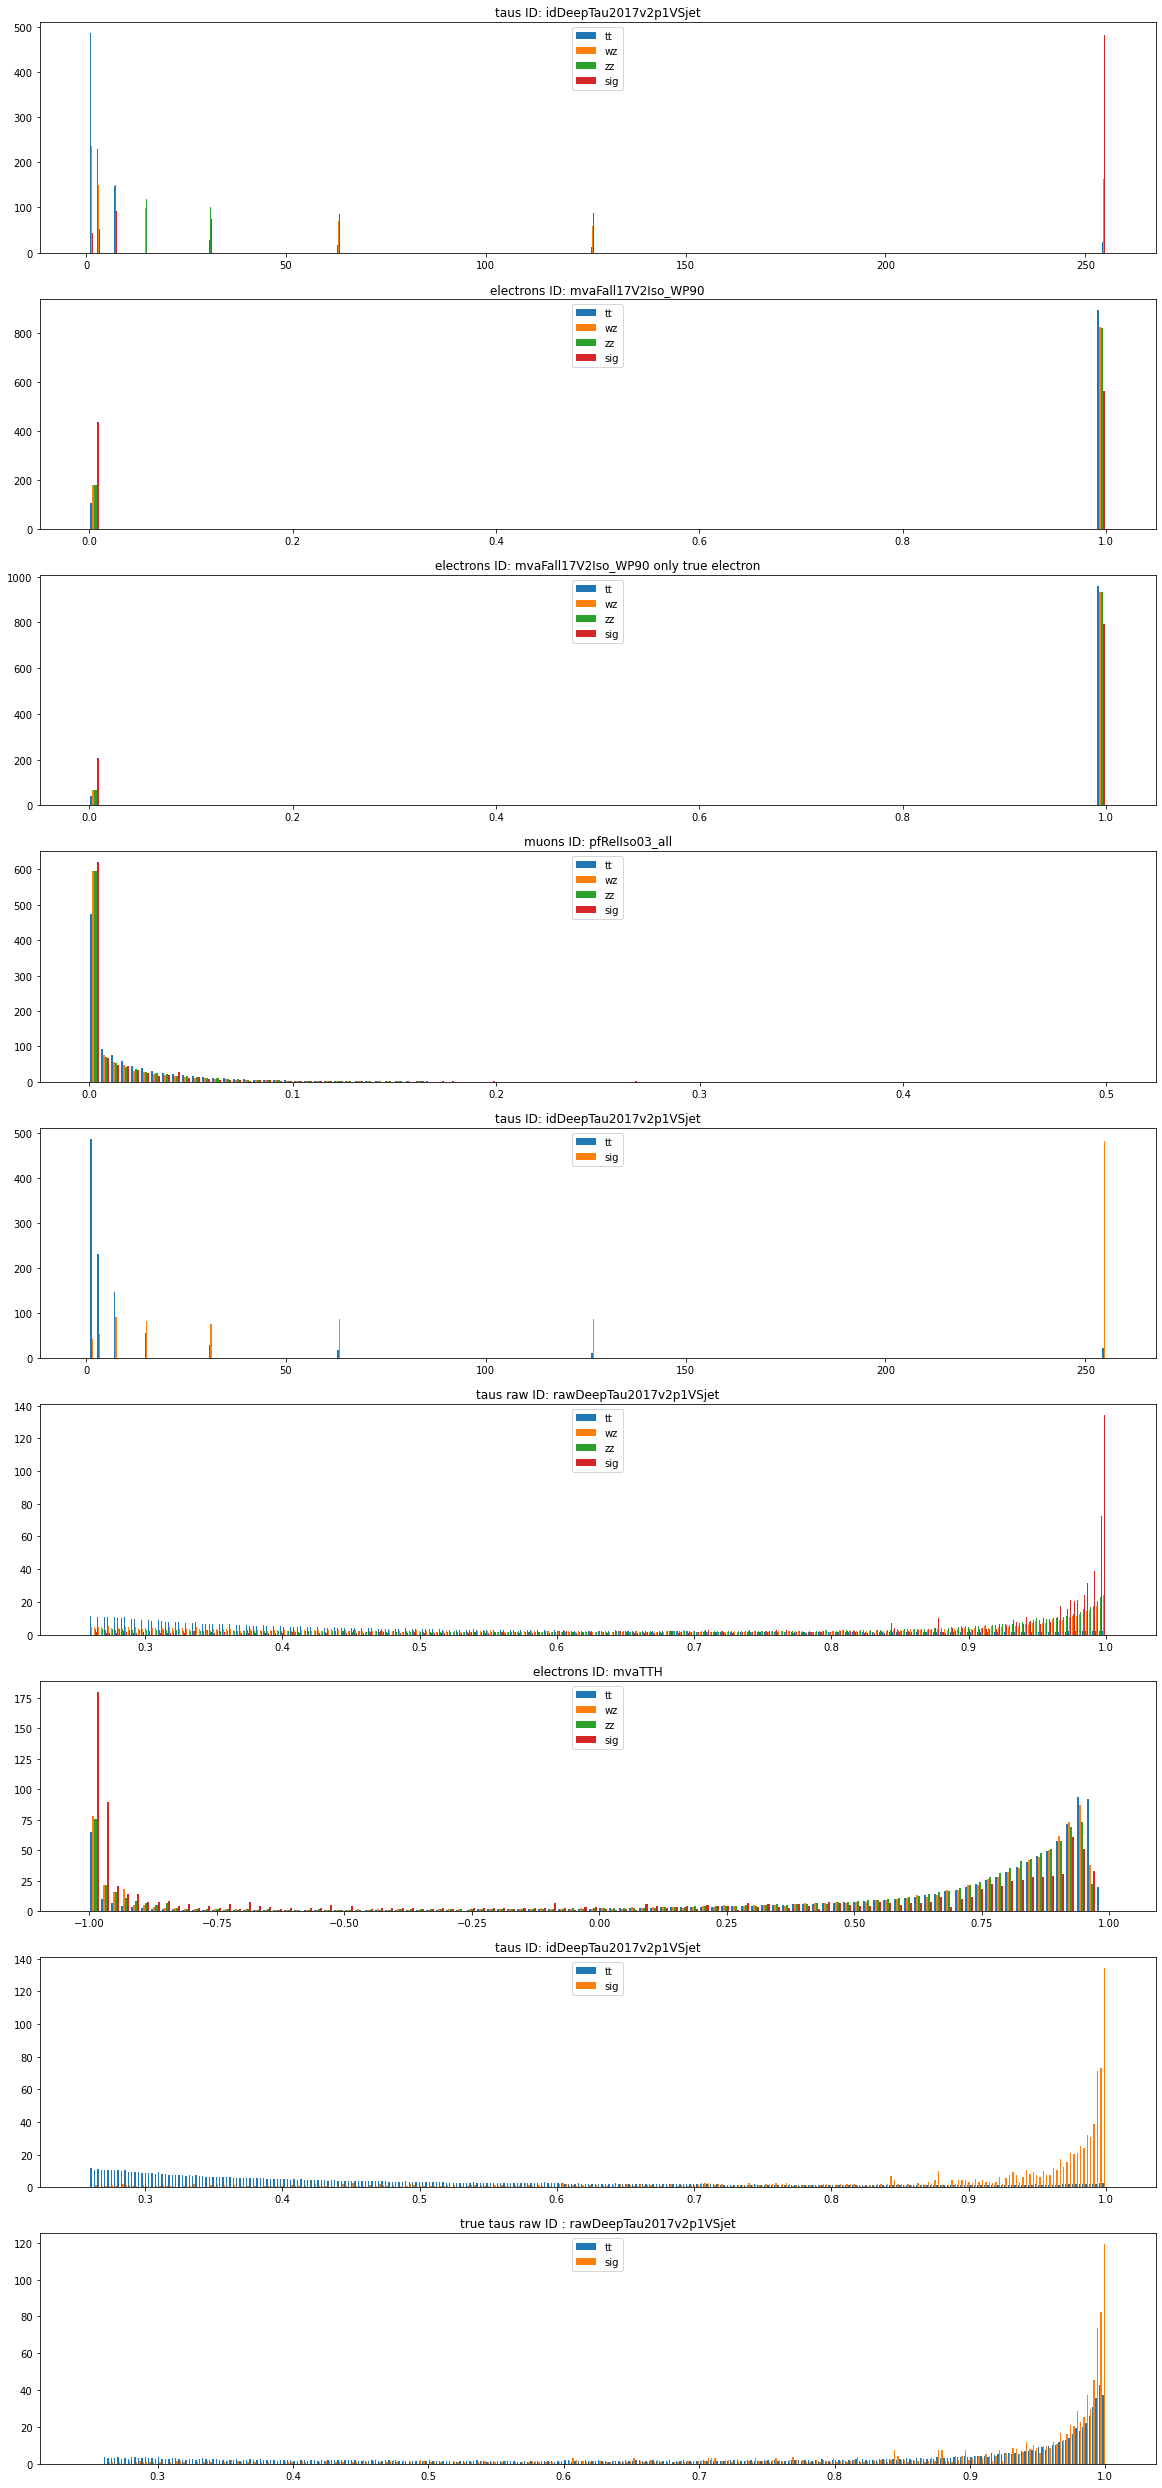

In [3]:
####FOR EMUTAU events

import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import numpy as np
from matplotlib import pyplot as plt 

fname = 'C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\tt2l2nu\\nano.root'
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")


events['weight'] = events.genWeight
#events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) ]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.5)&  (np.abs(events.Muon.dxy) < 0.005)]
#events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]

muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
notinjet1 = ak.any(muon1.jetIdx == -1) 
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['OtherMuon'] = events.Muon[~( (events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005))]
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=0.5)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
notinjet2 = ak.any(tau2.jetIdx == int(-1))
notinjet3 = ak.any(tau3.jetIdx == int(-1))
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  
#events = events[ak.num(events.SelElectron) + ak.num(events.SelMuon) + ak.num(events.SelTau) == 3]   
events = events[ak.num(events.SelElectron) == 1]   
events = events[ak.num(events.SelTau) == 1]   
events = events[ak.num(events.SelMuon) == 1]   



events['SelLepton'] = ak.concatenate([events.SelElectron, events.SelMuon, events.SelTau],axis = -1)
tt_tau_id = ak.flatten(events.SelTau.idDeepTau2017v2p1VSjet)
tt_tau_rawid = ak.flatten(events.SelTau.rawDeepTau2017v2p1VSjet)


events_temp = events[ak.all(events.SelTau.genPartIdx >=0, axis = -1)]
events_temp = events_temp[ak.all(events_temp.SelTau.genPartIdx <3, axis = -1)]
tt_true_tau_rawid = ak.flatten(events_temp.SelTau.rawDeepTau2017v2p1VSjet[abs(events_temp.GenVisTau[events_temp.SelTau.genPartIdx].parent.pdgId) == 15])


events['true_taus'] = events.SelTau[events.SelTau.genPartIdx >=0]
events['true_taus'] = events.true_taus[events.true_taus.genPartIdx < 5]
events['true_taus'] = events.true_taus[abs(events.GenVisTau[events.true_taus.genPartIdx].parent.pdgId) == 15]
tt_true_tau_rawid_2 = ak.flatten(events.true_taus.rawDeepTau2017v2p1VSjet)


tt_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90)
tt_true_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90[abs(events.GenPart[events.SelElectron.genPartIdx].pdgId) == 11])
tt_electron_TTHid = ak.flatten(events.SelElectron.mvaTTH)
tt_muon_id = ak.flatten(events.SelMuon.pfRelIso03_all)





###############WZ

fname = 'C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\wz\\nano.root'
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")


events['weight'] = events.genWeight
#events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) ]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.5)&  (np.abs(events.Muon.dxy) < 0.005)]
#events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]

muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
notinjet1 = ak.any(muon1.jetIdx == -1) 
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['OtherMuon'] = events.Muon[~( (events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005))]
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=0.5)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
notinjet2 = ak.any(tau2.jetIdx == int(-1))
notinjet3 = ak.any(tau3.jetIdx == int(-1))
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  
#events = events[ak.num(events.SelElectron) + ak.num(events.SelMuon) + ak.num(events.SelTau) == 3]   
events = events[ak.num(events.SelElectron) == 1]   
events = events[ak.num(events.SelTau) == 1]   
events = events[ak.num(events.SelMuon) == 1]   
events['SelLepton'] = ak.concatenate([events.SelElectron, events.SelMuon, events.SelTau],axis = -1)
wz_tau_rawid = ak.flatten(events.SelTau.rawDeepTau2017v2p1VSjet)
wz_tau_id = ak.flatten(events.SelTau.idDeepTau2017v2p1VSjet)
wz_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90)
wz_true_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90[abs(events.GenPart[events.SelElectron.genPartIdx].pdgId) == 11])
events_temp = events[ak.all(events.SelTau.genPartIdx >=0, axis = -1)]
events_temp = events_temp[ak.all(events_temp.SelTau.genPartIdx <3, axis = -1)]
wz_true_tau_rawid = ak.flatten(events_temp.SelTau.rawDeepTau2017v2p1VSjet[abs(events_temp.GenVisTau[events_temp.SelTau.genPartIdx].parent.pdgId) == 15])
wz_muon_id = ak.flatten(events.SelMuon.pfRelIso03_all)
wz_electron_TTHid = ak.flatten(events.SelElectron.mvaTTH)


events['true_taus'] = events.SelTau[events.SelTau.genPartIdx >=0]
events['true_taus'] = events.true_taus[events.true_taus.genPartIdx < 3]
events['true_taus'] = events.true_taus[abs(events.GenVisTau[events.true_taus.genPartIdx].parent.pdgId) == 15]
wz_true_tau_rawid_2 = ak.flatten(events.true_taus.rawDeepTau2017v2p1VSjet)




######################ZZ

fname = 'C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\zz\\nano.root'
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")


events['weight'] = events.genWeight
#events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) ]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.5)&  (np.abs(events.Muon.dxy) < 0.005)]
#events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
notinjet1 = ak.any(muon1.jetIdx == -1) 
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['OtherMuon'] = events.Muon[~( (events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005))]
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=0.5)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
notinjet2 = ak.any(tau2.jetIdx == int(-1))
notinjet3 = ak.any(tau3.jetIdx == int(-1))
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  
#events = events[ak.num(events.SelElectron) + ak.num(events.SelMuon) + ak.num(events.SelTau) == 3]   
events = events[ak.num(events.SelElectron) == 1]   
events = events[ak.num(events.SelTau) == 1]   
events = events[ak.num(events.SelMuon) == 1]   
events['SelLepton'] = ak.concatenate([events.SelElectron, events.SelMuon, events.SelTau],axis = -1)
zz_tau_id = ak.flatten(events.SelTau.idDeepTau2017v2p1VSjet)
zz_tau_rawid = ak.flatten(events.SelTau.rawDeepTau2017v2p1VSjet)
zz_electron_TTHid = ak.flatten(events.SelElectron.mvaTTH)
zz_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90)
zz_true_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90[abs(events.GenPart[events.SelElectron.genPartIdx].pdgId) == 11])
events_temp = events[ak.all(events.SelTau.genPartIdx >=0, axis = -1)]
events_temp = events_temp[ak.all(events_temp.SelTau.genPartIdx <5, axis = -1)]
zz_true_tau_rawid = ak.flatten(events_temp.SelTau.rawDeepTau2017v2p1VSjet[abs(events_temp.GenVisTau[events_temp.SelTau.genPartIdx].parent.pdgId) == 15])
zz_muon_id = ak.flatten(events.SelMuon.pfRelIso03_all)

events['true_taus'] = events.SelTau[events.SelTau.genPartIdx >=0]
events['true_taus'] = events.true_taus[events.true_taus.genPartIdx < 5]
events['true_taus'] = events.true_taus[abs(events.GenVisTau[events.true_taus.genPartIdx].parent.pdgId) == 15]
zz_true_tau_rawid_2 = ak.flatten(events.true_taus.rawDeepTau2017v2p1VSjet)


###############data test
fname = 'C:\\Users\\lucas\\Desktop\\PDM\\analysis\\data_test.root'
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")
events['weight'] = events.genWeight
#events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) ]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.5)&  (np.abs(events.Muon.dxy) < 0.005)]
#events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
notinjet1 = ak.any(muon1.jetIdx == -1) 
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['OtherMuon'] = events.Muon[~( (events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005))]
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=0.5)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
notinjet2 = ak.any(tau2.jetIdx == int(-1))
notinjet3 = ak.any(tau3.jetIdx == int(-1))
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  
#events = events[ak.num(events.SelElectron) + ak.num(events.SelMuon) + ak.num(events.SelTau) == 3]   
events = events[ak.num(events.SelElectron) == 1]   
events = events[ak.num(events.SelTau) == 1]   
events = events[ak.num(events.SelMuon) == 1]
print(events)
print(len(events))   
events['SelLepton'] = ak.concatenate([events.SelElectron, events.SelMuon, events.SelTau],axis = -1)
sig_tau_id = ak.flatten(events.SelTau.idDeepTau2017v2p1VSjet)
sig_tau_rawid = ak.flatten(events.SelTau.rawDeepTau2017v2p1VSjet)
sig_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90)
sig_muon_id = ak.flatten(events.SelMuon.pfRelIso03_all)
sig_electron_TTHid = ak.flatten(events.SelElectron.mvaTTH)
sig_true_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90[abs(events.GenPart[events.SelElectron.genPartIdx].pdgId) == 11])
events_temp = events[ak.all(events.SelTau.genPartIdx >=0, axis = -1)]
events_temp = events_temp[ak.all(events_temp.SelTau.genPartIdx <5, axis = -1)]
sig_true_tau_rawid = ak.flatten(events_temp.SelTau.rawDeepTau2017v2p1VSjet[abs(events_temp.GenVisTau[events_temp.SelTau.genPartIdx].parent.pdgId) == 15])

events['true_taus'] = events.SelTau[events.SelTau.genPartIdx >=0]
events['true_taus'] = events.true_taus[events.true_taus.genPartIdx < 5]
events['true_taus'] = events.true_taus[abs(events.GenVisTau[events.true_taus.genPartIdx].parent.pdgId) == 15]
sig_true_tau_rawid_2 = ak.flatten(events.true_taus.rawDeepTau2017v2p1VSjet)


(counts1, bins1) = np.histogram(tt_tau_id, bins = 300)
(counts2, bins2) = np.histogram(wz_tau_id, bins = 300)
(counts3, bins3) = np.histogram(zz_tau_id, bins = 300)
(counts4, bins4) = np.histogram(sig_tau_id, bins = 300)
plt.figure(figsize=(20,50))
plt.subplot(10, 1, 1)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("taus ID: idDeepTau2017v2p1VSjet")
plt.subplot(10, 1, 2)
(counts1, bins1) = np.histogram(tt_electron_id, bins = 100)
(counts2, bins2) = np.histogram(wz_electron_id, bins = 100)
(counts3, bins3) = np.histogram(zz_electron_id, bins = 100)
(counts4, bins4) = np.histogram(sig_electron_id, bins = 100)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("electrons ID: mvaFall17V2Iso_WP90")
plt.subplot(10, 1, 3)
(counts1, bins1) = np.histogram(tt_true_electron_id, bins = 100)
(counts2, bins2) = np.histogram(wz_true_electron_id, bins = 100)
(counts3, bins3) = np.histogram(zz_true_electron_id, bins = 100)
(counts4, bins4) = np.histogram(sig_true_electron_id, bins = 100)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("electrons ID: mvaFall17V2Iso_WP90 only true electron")

plt.subplot(10, 1, 4)
(counts1, bins1) = np.histogram(tt_muon_id, bins = 100)
(counts2, bins2) = np.histogram(wz_muon_id, bins = 100)
(counts3, bins3) = np.histogram(zz_muon_id, bins = 100)
(counts4, bins4) = np.histogram(sig_muon_id, bins = 100)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("muons ID: pfRelIso03_all")
(counts1, bins1) = np.histogram(tt_tau_id, bins = 300)
(counts4, bins4) = np.histogram(sig_tau_id, bins = 300)
plt.subplot(10, 1, 5)
plt.hist([bins1[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts4/sum(counts4)], label = ["tt", "sig"])
plt.legend(loc='upper center')
plt.title("taus ID: idDeepTau2017v2p1VSjet")

(counts1, bins1) = np.histogram(tt_tau_rawid, bins = 300)
(counts2, bins2) = np.histogram(wz_tau_rawid, bins = 300)
(counts3, bins3) = np.histogram(zz_tau_rawid, bins = 300)
(counts4, bins4) = np.histogram(sig_tau_rawid, bins = 300)
plt.subplot(10, 1, 6)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("taus raw ID: rawDeepTau2017v2p1VSjet")

plt.subplot(10, 1, 7)
(counts1, bins1) = np.histogram(tt_electron_TTHid, bins = 100)
(counts2, bins2) = np.histogram(wz_electron_TTHid, bins = 100)
(counts3, bins3) = np.histogram(zz_electron_TTHid, bins = 100)
(counts4, bins4) = np.histogram(sig_electron_TTHid, bins = 100)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("electrons ID: mvaTTH")

(counts1, bins1) = np.histogram(tt_tau_rawid, bins = 300)
(counts4, bins4) = np.histogram(sig_tau_rawid, bins = 300)
plt.subplot(10, 1, 8)
plt.hist([bins1[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts4/sum(counts4)], label = ["tt", "sig"])
plt.legend(loc='upper center')
plt.title("taus ID: idDeepTau2017v2p1VSjet")


(counts1, bins1) = np.histogram(tt_true_tau_rawid_2, bins = 300, range = (0.25,1))
(counts4, bins4) = np.histogram(sig_true_tau_rawid_2, bins = 300, range = (0.25,1))
plt.subplot(10, 1, 9)

plt.hist([bins1[:-1], bins4[:-1]], bins4, weights=[1000*counts1/sum(counts1), 1000*counts4/sum(counts4)], label = ["tt", "sig"])
plt.legend(loc='upper center')
plt.title("true taus raw ID : rawDeepTau2017v2p1VSjet")


plt.savefig("ID_distributions_leptons_emutau.pdf")
plt.show()




C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx2 => SubJet
  RuntimeWarning,


done
done
done
done
[<event 1:166:24638>, <event 1:166:24650>, ... <event 1:495:73710>]
1121


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:240: RuntimeWarning: invalid value encountered in true_divide


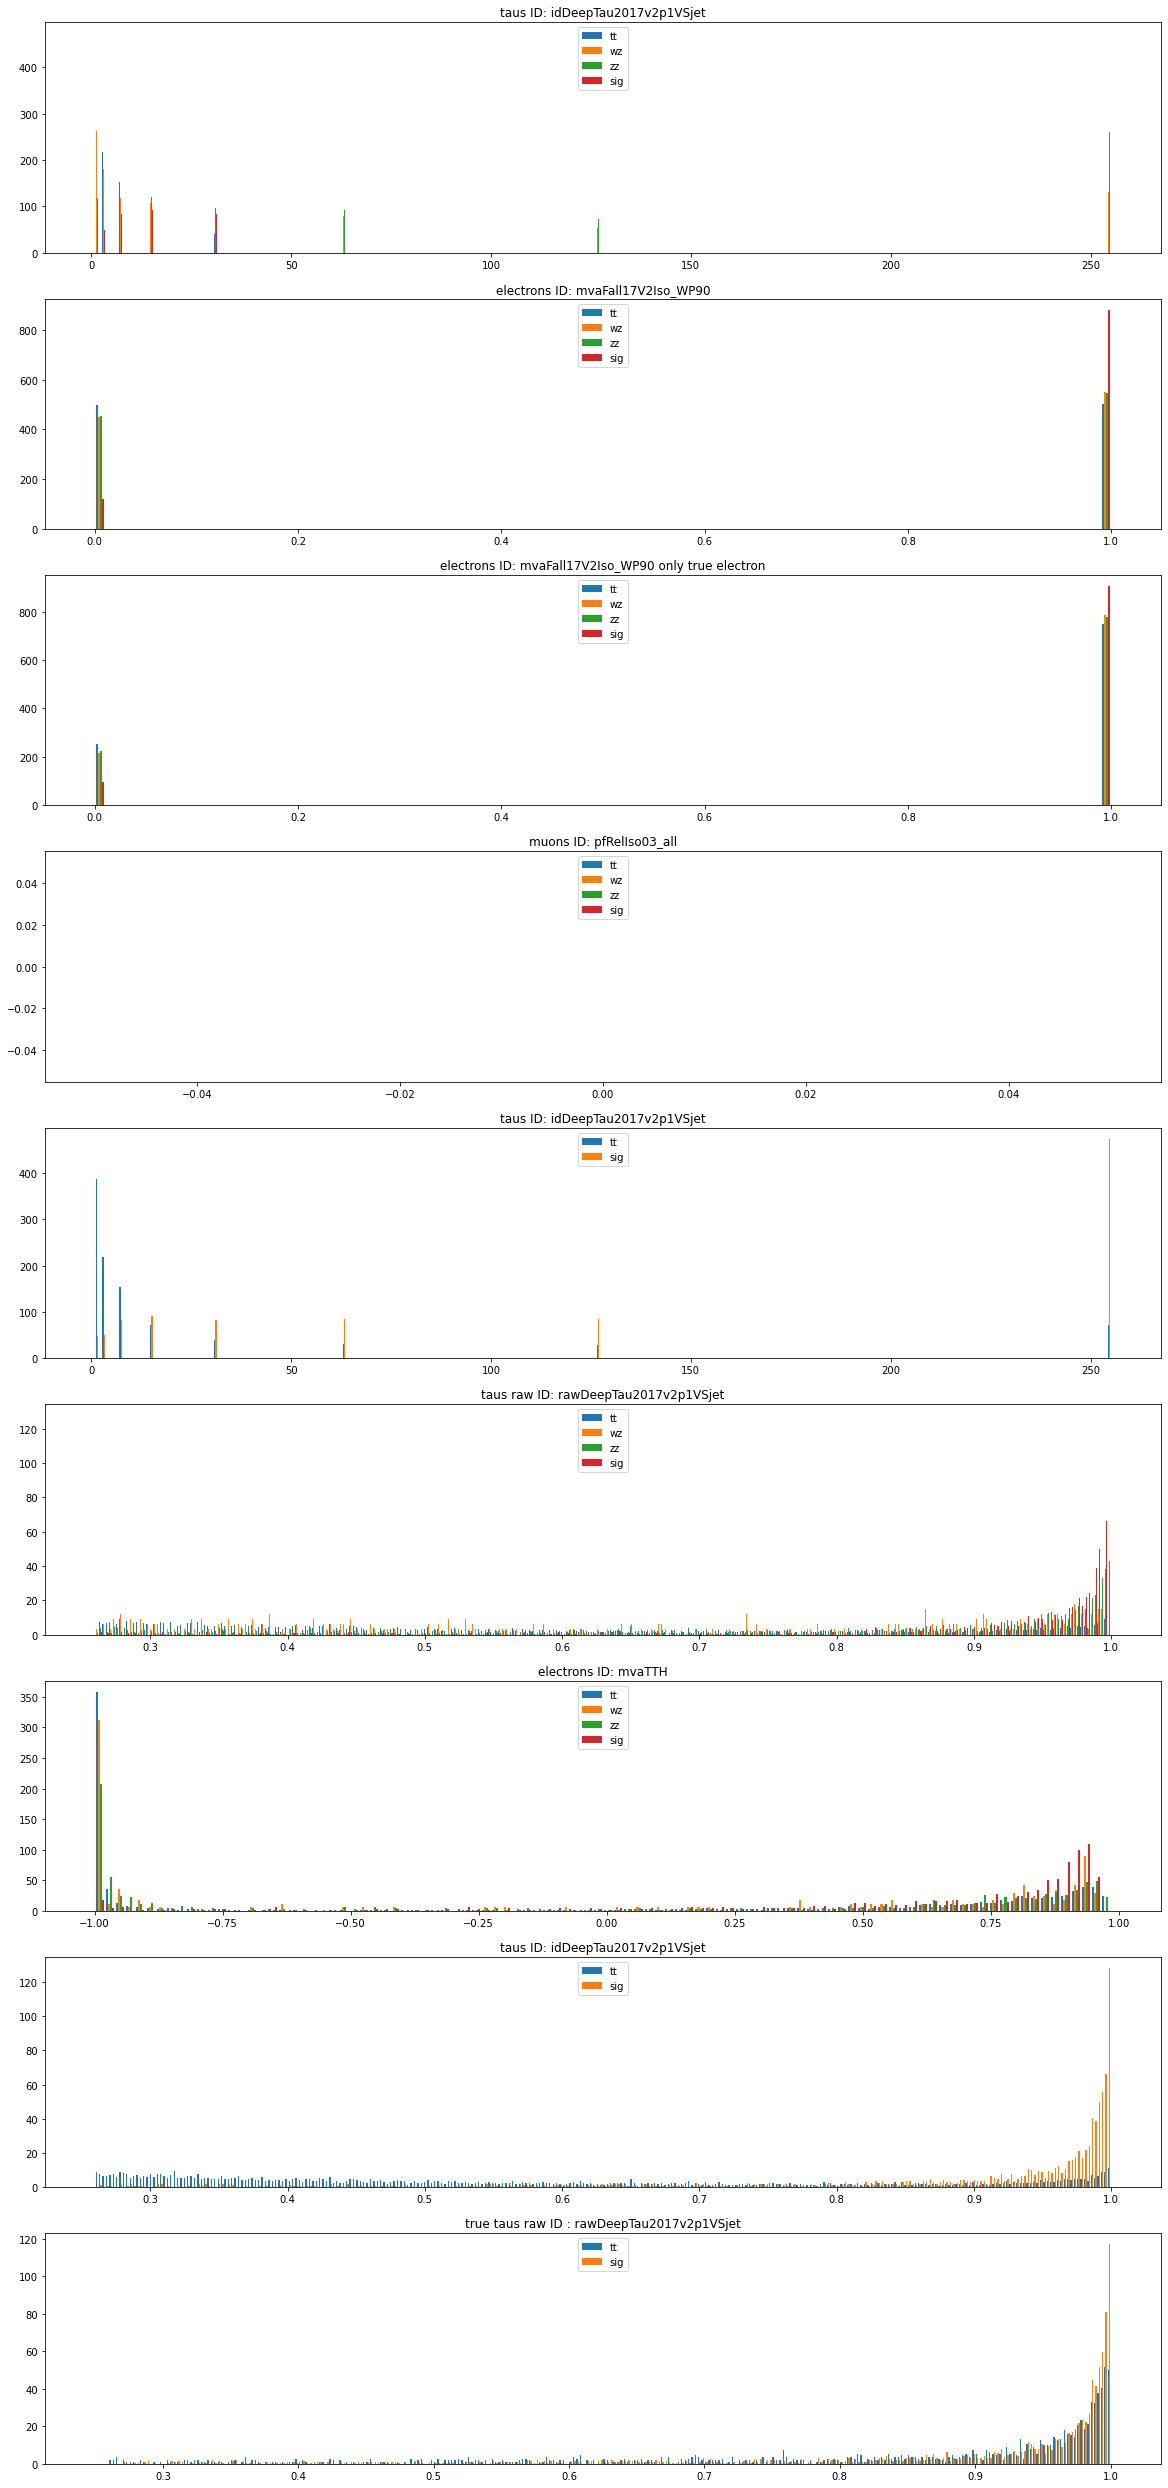

In [4]:
####FOR ETAUTAU events

import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import numpy as np
from matplotlib import pyplot as plt 

fname = 'C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\tt2l2nu\\nano.root'
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")


events['weight'] = events.genWeight
#events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) ]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.5)&  (np.abs(events.Muon.dxy) < 0.005)]
#events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]

muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
notinjet1 = ak.any(muon1.jetIdx == -1) 
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['OtherMuon'] = events.Muon[~( (events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005))]
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=0.5)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
notinjet2 = ak.any(tau2.jetIdx == int(-1))
notinjet3 = ak.any(tau3.jetIdx == int(-1))
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  
#events = events[ak.num(events.SelElectron) + ak.num(events.SelMuon) + ak.num(events.SelTau) == 3]   
events = events[ak.num(events.SelElectron) == 1]   
events = events[ak.num(events.SelTau) == 2]   
events = events[ak.num(events.SelMuon) == 0]   



events['SelLepton'] = ak.concatenate([events.SelElectron, events.SelMuon, events.SelTau],axis = -1)
tt_tau_id = ak.flatten(events.SelTau.idDeepTau2017v2p1VSjet)
tt_tau_rawid = ak.flatten(events.SelTau.rawDeepTau2017v2p1VSjet)


events_temp = events[ak.all(events.SelTau.genPartIdx >=0, axis = -1)]
events_temp = events_temp[ak.all(events_temp.SelTau.genPartIdx <3, axis = -1)]
tt_true_tau_rawid = ak.flatten(events_temp.SelTau.rawDeepTau2017v2p1VSjet[abs(events_temp.GenVisTau[events_temp.SelTau.genPartIdx].parent.pdgId) == 15])


events['true_taus'] = events.SelTau[events.SelTau.genPartIdx >=0]
events['true_taus'] = events.true_taus[events.true_taus.genPartIdx < 5]
events['true_taus'] = events.true_taus[abs(events.GenVisTau[events.true_taus.genPartIdx].parent.pdgId) == 15]
tt_true_tau_rawid_2 = ak.flatten(events.true_taus.rawDeepTau2017v2p1VSjet)


tt_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90)
tt_true_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90[abs(events.GenPart[events.SelElectron.genPartIdx].pdgId) == 11])
tt_electron_TTHid = ak.flatten(events.SelElectron.mvaTTH)
tt_muon_id = ak.flatten(events.SelMuon.pfRelIso03_all)





###############WZ

fname = 'C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\wz\\nano.root'
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")


events['weight'] = events.genWeight
#events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) ]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.5)&  (np.abs(events.Muon.dxy) < 0.005)]
#events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]

muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
notinjet1 = ak.any(muon1.jetIdx == -1) 
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['OtherMuon'] = events.Muon[~( (events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005))]
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=0.5)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
notinjet2 = ak.any(tau2.jetIdx == int(-1))
notinjet3 = ak.any(tau3.jetIdx == int(-1))
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  
#events = events[ak.num(events.SelElectron) + ak.num(events.SelMuon) + ak.num(events.SelTau) == 3]   
events = events[ak.num(events.SelElectron) == 1]   
events = events[ak.num(events.SelTau) == 2]   
events = events[ak.num(events.SelMuon) == 0]   
events['SelLepton'] = ak.concatenate([events.SelElectron, events.SelMuon, events.SelTau],axis = -1)
wz_tau_rawid = ak.flatten(events.SelTau.rawDeepTau2017v2p1VSjet)
wz_tau_id = ak.flatten(events.SelTau.idDeepTau2017v2p1VSjet)
wz_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90)
wz_true_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90[abs(events.GenPart[events.SelElectron.genPartIdx].pdgId) == 11])
events_temp = events[ak.all(events.SelTau.genPartIdx >=0, axis = -1)]
events_temp = events_temp[ak.all(events_temp.SelTau.genPartIdx <3, axis = -1)]
wz_true_tau_rawid = ak.flatten(events_temp.SelTau.rawDeepTau2017v2p1VSjet[abs(events_temp.GenVisTau[events_temp.SelTau.genPartIdx].parent.pdgId) == 15])
wz_muon_id = ak.flatten(events.SelMuon.pfRelIso03_all)
wz_electron_TTHid = ak.flatten(events.SelElectron.mvaTTH)


events['true_taus'] = events.SelTau[events.SelTau.genPartIdx >=0]
events['true_taus'] = events.true_taus[events.true_taus.genPartIdx < 3]
events['true_taus'] = events.true_taus[abs(events.GenVisTau[events.true_taus.genPartIdx].parent.pdgId) == 15]
wz_true_tau_rawid_2 = ak.flatten(events.true_taus.rawDeepTau2017v2p1VSjet)




######################ZZ

fname = 'C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\zz\\nano.root'
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")


events['weight'] = events.genWeight
#events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) ]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.5)&  (np.abs(events.Muon.dxy) < 0.005)]
#events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
notinjet1 = ak.any(muon1.jetIdx == -1) 
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['OtherMuon'] = events.Muon[~( (events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005))]
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=0.5)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
notinjet2 = ak.any(tau2.jetIdx == int(-1))
notinjet3 = ak.any(tau3.jetIdx == int(-1))
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  
#events = events[ak.num(events.SelElectron) + ak.num(events.SelMuon) + ak.num(events.SelTau) == 3]   
events = events[ak.num(events.SelElectron) == 1]   
events = events[ak.num(events.SelTau) == 2]   
events = events[ak.num(events.SelMuon) == 0]   
events['SelLepton'] = ak.concatenate([events.SelElectron, events.SelMuon, events.SelTau],axis = -1)
zz_tau_id = ak.flatten(events.SelTau.idDeepTau2017v2p1VSjet)
zz_tau_rawid = ak.flatten(events.SelTau.rawDeepTau2017v2p1VSjet)
zz_electron_TTHid = ak.flatten(events.SelElectron.mvaTTH)
zz_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90)
zz_true_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90[abs(events.GenPart[events.SelElectron.genPartIdx].pdgId) == 11])
events_temp = events[ak.all(events.SelTau.genPartIdx >=0, axis = -1)]
events_temp = events_temp[ak.all(events_temp.SelTau.genPartIdx <5, axis = -1)]
zz_true_tau_rawid = ak.flatten(events_temp.SelTau.rawDeepTau2017v2p1VSjet[abs(events_temp.GenVisTau[events_temp.SelTau.genPartIdx].parent.pdgId) == 15])
zz_muon_id = ak.flatten(events.SelMuon.pfRelIso03_all)

events['true_taus'] = events.SelTau[events.SelTau.genPartIdx >=0]
events['true_taus'] = events.true_taus[events.true_taus.genPartIdx < 5]
events['true_taus'] = events.true_taus[abs(events.GenVisTau[events.true_taus.genPartIdx].parent.pdgId) == 15]
zz_true_tau_rawid_2 = ak.flatten(events.true_taus.rawDeepTau2017v2p1VSjet)


###############data test
fname = 'C:\\Users\\lucas\\Desktop\\PDM\\analysis\\data_test.root'
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")
events['weight'] = events.genWeight
#events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) ]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.5)&  (np.abs(events.Muon.dxy) < 0.005)]
#events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
notinjet1 = ak.any(muon1.jetIdx == -1) 
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['OtherMuon'] = events.Muon[~( (events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005))]
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=0.5)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
notinjet2 = ak.any(tau2.jetIdx == int(-1))
notinjet3 = ak.any(tau3.jetIdx == int(-1))
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  
#events = events[ak.num(events.SelElectron) + ak.num(events.SelMuon) + ak.num(events.SelTau) == 3]   
events = events[ak.num(events.SelElectron) == 1]   
events = events[ak.num(events.SelTau) == 2]   
events = events[ak.num(events.SelMuon) == 0]   


print(events)
print(len(events))


events['SelLepton'] = ak.concatenate([events.SelElectron, events.SelMuon, events.SelTau],axis = -1)
sig_tau_id = ak.flatten(events.SelTau.idDeepTau2017v2p1VSjet)
sig_tau_rawid = ak.flatten(events.SelTau.rawDeepTau2017v2p1VSjet)
sig_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90)
sig_muon_id = ak.flatten(events.SelMuon.pfRelIso03_all)
sig_electron_TTHid = ak.flatten(events.SelElectron.mvaTTH)
sig_true_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90[abs(events.GenPart[events.SelElectron.genPartIdx].pdgId) == 11])
events_temp = events[ak.all(events.SelTau.genPartIdx >=0, axis = -1)]
events_temp = events_temp[ak.all(events_temp.SelTau.genPartIdx <5, axis = -1)]
sig_true_tau_rawid = ak.flatten(events_temp.SelTau.rawDeepTau2017v2p1VSjet[abs(events_temp.GenVisTau[events_temp.SelTau.genPartIdx].parent.pdgId) == 15])

events['true_taus'] = events.SelTau[events.SelTau.genPartIdx >=0]
events['true_taus'] = events.true_taus[events.true_taus.genPartIdx < 5]
events['true_taus'] = events.true_taus[abs(events.GenVisTau[events.true_taus.genPartIdx].parent.pdgId) == 15]
sig_true_tau_rawid_2 = ak.flatten(events.true_taus.rawDeepTau2017v2p1VSjet)


(counts1, bins1) = np.histogram(tt_tau_id, bins = 300)
(counts2, bins2) = np.histogram(wz_tau_id, bins = 300)
(counts3, bins3) = np.histogram(zz_tau_id, bins = 300)
(counts4, bins4) = np.histogram(sig_tau_id, bins = 300)
plt.figure(figsize=(20,50))
plt.subplot(10, 1, 1)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("taus ID: idDeepTau2017v2p1VSjet")
plt.subplot(10, 1, 2)
(counts1, bins1) = np.histogram(tt_electron_id, bins = 100)
(counts2, bins2) = np.histogram(wz_electron_id, bins = 100)
(counts3, bins3) = np.histogram(zz_electron_id, bins = 100)
(counts4, bins4) = np.histogram(sig_electron_id, bins = 100)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("electrons ID: mvaFall17V2Iso_WP90")
plt.subplot(10, 1, 3)
(counts1, bins1) = np.histogram(tt_true_electron_id, bins = 100)
(counts2, bins2) = np.histogram(wz_true_electron_id, bins = 100)
(counts3, bins3) = np.histogram(zz_true_electron_id, bins = 100)
(counts4, bins4) = np.histogram(sig_true_electron_id, bins = 100)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("electrons ID: mvaFall17V2Iso_WP90 only true electron")

plt.subplot(10, 1, 4)
(counts1, bins1) = np.histogram(tt_muon_id, bins = 100)
(counts2, bins2) = np.histogram(wz_muon_id, bins = 100)
(counts3, bins3) = np.histogram(zz_muon_id, bins = 100)
(counts4, bins4) = np.histogram(sig_muon_id, bins = 100)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("muons ID: pfRelIso03_all")
(counts1, bins1) = np.histogram(tt_tau_id, bins = 300)
(counts4, bins4) = np.histogram(sig_tau_id, bins = 300)
plt.subplot(10, 1, 5)
plt.hist([bins1[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts4/sum(counts4)], label = ["tt", "sig"])
plt.legend(loc='upper center')
plt.title("taus ID: idDeepTau2017v2p1VSjet")

(counts1, bins1) = np.histogram(tt_tau_rawid, bins = 300)
(counts2, bins2) = np.histogram(wz_tau_rawid, bins = 300)
(counts3, bins3) = np.histogram(zz_tau_rawid, bins = 300)
(counts4, bins4) = np.histogram(sig_tau_rawid, bins = 300)
plt.subplot(10, 1, 6)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("taus raw ID: rawDeepTau2017v2p1VSjet")

plt.subplot(10, 1, 7)
(counts1, bins1) = np.histogram(tt_electron_TTHid, bins = 100)
(counts2, bins2) = np.histogram(wz_electron_TTHid, bins = 100)
(counts3, bins3) = np.histogram(zz_electron_TTHid, bins = 100)
(counts4, bins4) = np.histogram(sig_electron_TTHid, bins = 100)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("electrons ID: mvaTTH")

(counts1, bins1) = np.histogram(tt_tau_rawid, bins = 300)
(counts4, bins4) = np.histogram(sig_tau_rawid, bins = 300)
plt.subplot(10, 1, 8)
plt.hist([bins1[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts4/sum(counts4)], label = ["tt", "sig"])
plt.legend(loc='upper center')
plt.title("taus ID: idDeepTau2017v2p1VSjet")


(counts1, bins1) = np.histogram(tt_true_tau_rawid_2, bins = 300, range = (0.25,1))
(counts4, bins4) = np.histogram(sig_true_tau_rawid_2, bins = 300, range = (0.25,1))
plt.subplot(10, 1, 9)

plt.hist([bins1[:-1], bins4[:-1]], bins4, weights=[1000*counts1/sum(counts1), 1000*counts4/sum(counts4)], label = ["tt", "sig"])
plt.legend(loc='upper center')
plt.title("true taus raw ID : rawDeepTau2017v2p1VSjet")


plt.savefig("ID_distributions_leptons_etautau.pdf")
plt.show()




C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx2 => SubJet
  RuntimeWarning,


done
done
done
done
[<event 1:166:24610>, <event 1:166:24640>, ... <event 1:495:73730>]
980


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:219: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:227: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:260: RuntimeWarning: invalid value encountered in true_divide


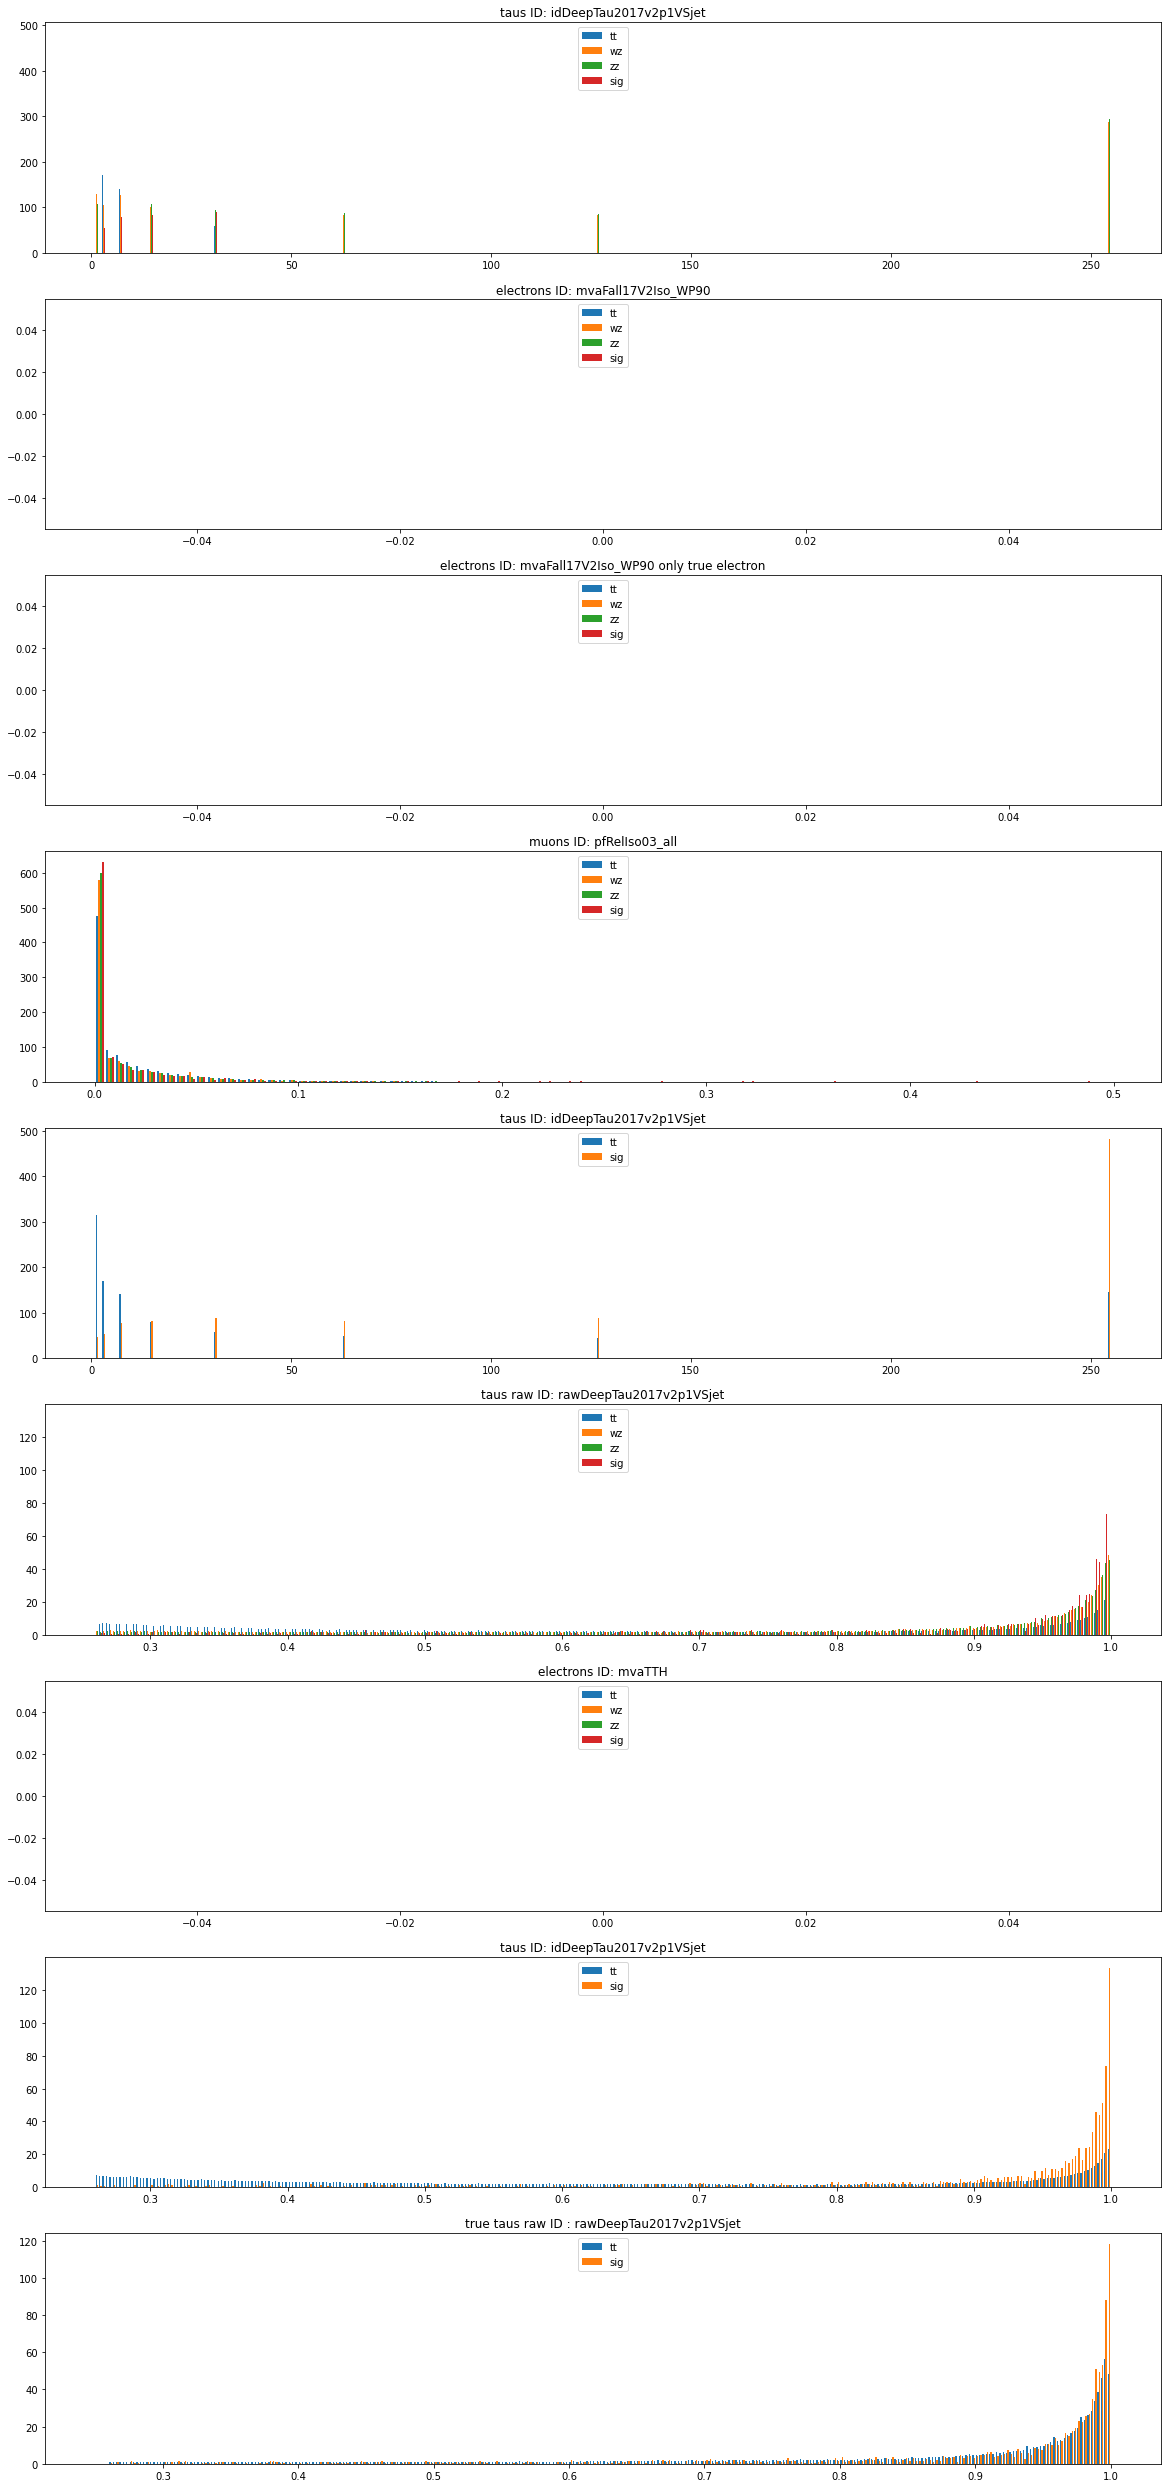

In [5]:
####FOR MUTAUTAU events

import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import numpy as np
from matplotlib import pyplot as plt 

fname = 'C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\tt2l2nu\\nano.root'
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")


events['weight'] = events.genWeight
#events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) ]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.5)&  (np.abs(events.Muon.dxy) < 0.005)]
#events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]

muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
notinjet1 = ak.any(muon1.jetIdx == -1) 
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['OtherMuon'] = events.Muon[~( (events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005))]
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=0.5)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
notinjet2 = ak.any(tau2.jetIdx == int(-1))
notinjet3 = ak.any(tau3.jetIdx == int(-1))
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  
#events = events[ak.num(events.SelElectron) + ak.num(events.SelMuon) + ak.num(events.SelTau) == 3]   
events = events[ak.num(events.SelElectron) == 0]   
events = events[ak.num(events.SelTau) == 2]   
events = events[ak.num(events.SelMuon) == 1]   



events['SelLepton'] = ak.concatenate([events.SelElectron, events.SelMuon, events.SelTau],axis = -1)
tt_tau_id = ak.flatten(events.SelTau.idDeepTau2017v2p1VSjet)
tt_tau_rawid = ak.flatten(events.SelTau.rawDeepTau2017v2p1VSjet)


events_temp = events[ak.all(events.SelTau.genPartIdx >=0, axis = -1)]
events_temp = events_temp[ak.all(events_temp.SelTau.genPartIdx <3, axis = -1)]
tt_true_tau_rawid = ak.flatten(events_temp.SelTau.rawDeepTau2017v2p1VSjet[abs(events_temp.GenVisTau[events_temp.SelTau.genPartIdx].parent.pdgId) == 15])


events['true_taus'] = events.SelTau[events.SelTau.genPartIdx >=0]
events['true_taus'] = events.true_taus[events.true_taus.genPartIdx < 5]
events['true_taus'] = events.true_taus[abs(events.GenVisTau[events.true_taus.genPartIdx].parent.pdgId) == 15]
tt_true_tau_rawid_2 = ak.flatten(events.true_taus.rawDeepTau2017v2p1VSjet)


tt_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90)
tt_true_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90[abs(events.GenPart[events.SelElectron.genPartIdx].pdgId) == 11])
tt_electron_TTHid = ak.flatten(events.SelElectron.mvaTTH)
tt_muon_id = ak.flatten(events.SelMuon.pfRelIso03_all)





###############WZ

fname = 'C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\wz\\nano.root'
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")


events['weight'] = events.genWeight
#events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) ]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.5)&  (np.abs(events.Muon.dxy) < 0.005)]
#events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]

muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
notinjet1 = ak.any(muon1.jetIdx == -1) 
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['OtherMuon'] = events.Muon[~( (events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005))]
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=0.5)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
notinjet2 = ak.any(tau2.jetIdx == int(-1))
notinjet3 = ak.any(tau3.jetIdx == int(-1))
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  
#events = events[ak.num(events.SelElectron) + ak.num(events.SelMuon) + ak.num(events.SelTau) == 3]   
events = events[ak.num(events.SelElectron) == 0]   
events = events[ak.num(events.SelTau) == 2]   
events = events[ak.num(events.SelMuon) == 1]   
events['SelLepton'] = ak.concatenate([events.SelElectron, events.SelMuon, events.SelTau],axis = -1)
wz_tau_rawid = ak.flatten(events.SelTau.rawDeepTau2017v2p1VSjet)
wz_tau_id = ak.flatten(events.SelTau.idDeepTau2017v2p1VSjet)
wz_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90)
wz_true_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90[abs(events.GenPart[events.SelElectron.genPartIdx].pdgId) == 11])
events_temp = events[ak.all(events.SelTau.genPartIdx >=0, axis = -1)]
events_temp = events_temp[ak.all(events_temp.SelTau.genPartIdx <3, axis = -1)]
wz_true_tau_rawid = ak.flatten(events_temp.SelTau.rawDeepTau2017v2p1VSjet[abs(events_temp.GenVisTau[events_temp.SelTau.genPartIdx].parent.pdgId) == 15])
wz_muon_id = ak.flatten(events.SelMuon.pfRelIso03_all)
wz_electron_TTHid = ak.flatten(events.SelElectron.mvaTTH)


events['true_taus'] = events.SelTau[events.SelTau.genPartIdx >=0]
events['true_taus'] = events.true_taus[events.true_taus.genPartIdx < 3]
events['true_taus'] = events.true_taus[abs(events.GenVisTau[events.true_taus.genPartIdx].parent.pdgId) == 15]
wz_true_tau_rawid_2 = ak.flatten(events.true_taus.rawDeepTau2017v2p1VSjet)




######################ZZ

fname = 'C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\zz\\nano.root'
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")


events['weight'] = events.genWeight
#events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) ]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.5)&  (np.abs(events.Muon.dxy) < 0.005)]
#events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
notinjet1 = ak.any(muon1.jetIdx == -1) 
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['OtherMuon'] = events.Muon[~( (events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005))]
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=0.5)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
notinjet2 = ak.any(tau2.jetIdx == int(-1))
notinjet3 = ak.any(tau3.jetIdx == int(-1))
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  
#events = events[ak.num(events.SelElectron) + ak.num(events.SelMuon) + ak.num(events.SelTau) == 3]   
events = events[ak.num(events.SelElectron) == 0]   
events = events[ak.num(events.SelTau) == 2]   
events = events[ak.num(events.SelMuon) == 1]   
events['SelLepton'] = ak.concatenate([events.SelElectron, events.SelMuon, events.SelTau],axis = -1)
zz_tau_id = ak.flatten(events.SelTau.idDeepTau2017v2p1VSjet)
zz_tau_rawid = ak.flatten(events.SelTau.rawDeepTau2017v2p1VSjet)
zz_electron_TTHid = ak.flatten(events.SelElectron.mvaTTH)
zz_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90)
zz_true_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90[abs(events.GenPart[events.SelElectron.genPartIdx].pdgId) == 11])
events_temp = events[ak.all(events.SelTau.genPartIdx >=0, axis = -1)]
events_temp = events_temp[ak.all(events_temp.SelTau.genPartIdx <5, axis = -1)]
zz_true_tau_rawid = ak.flatten(events_temp.SelTau.rawDeepTau2017v2p1VSjet[abs(events_temp.GenVisTau[events_temp.SelTau.genPartIdx].parent.pdgId) == 15])
zz_muon_id = ak.flatten(events.SelMuon.pfRelIso03_all)

events['true_taus'] = events.SelTau[events.SelTau.genPartIdx >=0]
events['true_taus'] = events.true_taus[events.true_taus.genPartIdx < 5]
events['true_taus'] = events.true_taus[abs(events.GenVisTau[events.true_taus.genPartIdx].parent.pdgId) == 15]
zz_true_tau_rawid_2 = ak.flatten(events.true_taus.rawDeepTau2017v2p1VSjet)


###############data test
fname = 'C:\\Users\\lucas\\Desktop\\PDM\\analysis\\data_test.root'
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")
events['weight'] = events.genWeight
#events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) ]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.5)&  (np.abs(events.Muon.dxy) < 0.005)]
#events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
notinjet1 = ak.any(muon1.jetIdx == -1) 
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['OtherMuon'] = events.Muon[~( (events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005))]
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=0.5)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
notinjet2 = ak.any(tau2.jetIdx == int(-1))
notinjet3 = ak.any(tau3.jetIdx == int(-1))
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  
#events = events[ak.num(events.SelElectron) + ak.num(events.SelMuon) + ak.num(events.SelTau) == 3]   
events = events[ak.num(events.SelElectron) == 0]   
events = events[ak.num(events.SelTau) == 2]   
events = events[ak.num(events.SelMuon) == 1]   
print(events)
print(len(events))  
events['SelLepton'] = ak.concatenate([events.SelElectron, events.SelMuon, events.SelTau],axis = -1)
sig_tau_id = ak.flatten(events.SelTau.idDeepTau2017v2p1VSjet)
sig_tau_rawid = ak.flatten(events.SelTau.rawDeepTau2017v2p1VSjet)
sig_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90)
sig_muon_id = ak.flatten(events.SelMuon.pfRelIso03_all)
sig_electron_TTHid = ak.flatten(events.SelElectron.mvaTTH)
sig_true_electron_id = ak.flatten(events.SelElectron.mvaFall17V2Iso_WP90[abs(events.GenPart[events.SelElectron.genPartIdx].pdgId) == 11])
events_temp = events[ak.all(events.SelTau.genPartIdx >=0, axis = -1)]
events_temp = events_temp[ak.all(events_temp.SelTau.genPartIdx <5, axis = -1)]
sig_true_tau_rawid = ak.flatten(events_temp.SelTau.rawDeepTau2017v2p1VSjet[abs(events_temp.GenVisTau[events_temp.SelTau.genPartIdx].parent.pdgId) == 15])

events['true_taus'] = events.SelTau[events.SelTau.genPartIdx >=0]
events['true_taus'] = events.true_taus[events.true_taus.genPartIdx < 5]
events['true_taus'] = events.true_taus[abs(events.GenVisTau[events.true_taus.genPartIdx].parent.pdgId) == 15]
sig_true_tau_rawid_2 = ak.flatten(events.true_taus.rawDeepTau2017v2p1VSjet)


(counts1, bins1) = np.histogram(tt_tau_id, bins = 300)
(counts2, bins2) = np.histogram(wz_tau_id, bins = 300)
(counts3, bins3) = np.histogram(zz_tau_id, bins = 300)
(counts4, bins4) = np.histogram(sig_tau_id, bins = 300)
plt.figure(figsize=(20,50))
plt.subplot(10, 1, 1)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("taus ID: idDeepTau2017v2p1VSjet")
plt.subplot(10, 1, 2)
(counts1, bins1) = np.histogram(tt_electron_id, bins = 100)
(counts2, bins2) = np.histogram(wz_electron_id, bins = 100)
(counts3, bins3) = np.histogram(zz_electron_id, bins = 100)
(counts4, bins4) = np.histogram(sig_electron_id, bins = 100)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("electrons ID: mvaFall17V2Iso_WP90")
plt.subplot(10, 1, 3)
(counts1, bins1) = np.histogram(tt_true_electron_id, bins = 100)
(counts2, bins2) = np.histogram(wz_true_electron_id, bins = 100)
(counts3, bins3) = np.histogram(zz_true_electron_id, bins = 100)
(counts4, bins4) = np.histogram(sig_true_electron_id, bins = 100)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("electrons ID: mvaFall17V2Iso_WP90 only true electron")

plt.subplot(10, 1, 4)
(counts1, bins1) = np.histogram(tt_muon_id, bins = 100)
(counts2, bins2) = np.histogram(wz_muon_id, bins = 100)
(counts3, bins3) = np.histogram(zz_muon_id, bins = 100)
(counts4, bins4) = np.histogram(sig_muon_id, bins = 100)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("muons ID: pfRelIso03_all")
(counts1, bins1) = np.histogram(tt_tau_id, bins = 300)
(counts4, bins4) = np.histogram(sig_tau_id, bins = 300)
plt.subplot(10, 1, 5)
plt.hist([bins1[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts4/sum(counts4)], label = ["tt", "sig"])
plt.legend(loc='upper center')
plt.title("taus ID: idDeepTau2017v2p1VSjet")

(counts1, bins1) = np.histogram(tt_tau_rawid, bins = 300)
(counts2, bins2) = np.histogram(wz_tau_rawid, bins = 300)
(counts3, bins3) = np.histogram(zz_tau_rawid, bins = 300)
(counts4, bins4) = np.histogram(sig_tau_rawid, bins = 300)
plt.subplot(10, 1, 6)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("taus raw ID: rawDeepTau2017v2p1VSjet")

plt.subplot(10, 1, 7)
(counts1, bins1) = np.histogram(tt_electron_TTHid, bins = 100)
(counts2, bins2) = np.histogram(wz_electron_TTHid, bins = 100)
(counts3, bins3) = np.histogram(zz_electron_TTHid, bins = 100)
(counts4, bins4) = np.histogram(sig_electron_TTHid, bins = 100)
plt.hist([bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts2/sum(counts2), 1000*counts3/sum(counts3), 1000*counts4/sum(counts4)], label = ["tt","wz","zz", "sig"])
plt.legend(loc='upper center')
plt.title("electrons ID: mvaTTH")

(counts1, bins1) = np.histogram(tt_tau_rawid, bins = 300)
(counts4, bins4) = np.histogram(sig_tau_rawid, bins = 300)
plt.subplot(10, 1, 8)
plt.hist([bins1[:-1], bins4[:-1]], bins1, weights=[1000*counts1/sum(counts1), 1000*counts4/sum(counts4)], label = ["tt", "sig"])
plt.legend(loc='upper center')
plt.title("taus ID: idDeepTau2017v2p1VSjet")


(counts1, bins1) = np.histogram(tt_true_tau_rawid_2, bins = 300, range = (0.25,1))
(counts4, bins4) = np.histogram(sig_true_tau_rawid_2, bins = 300, range = (0.25,1))
plt.subplot(10, 1, 9)

plt.hist([bins1[:-1], bins4[:-1]], bins4, weights=[1000*counts1/sum(counts1), 1000*counts4/sum(counts4)], label = ["tt", "sig"])
plt.legend(loc='upper center')
plt.title("true taus raw ID : rawDeepTau2017v2p1VSjet")


plt.savefig("ID_distributions_leptons_mutautau.pdf")
plt.show()


